<img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png'>

In [1]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
plt.style.use('bmh')
plt.style.use('seaborn-dark')

In [3]:
#reading the file
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#dropping unwanted columns
df=df.drop('Id',axis=1)
df=df.drop('Species',axis=1)

In [6]:
df.shape

(150, 4)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
#applying elbow meathod by getting the value of inertia
inertia=[]
for i in range(1,8):
    kmean=KMeans(n_clusters=i,max_iter=50,random_state=0)
    kmean=kmean.fit(df)
    inertia.append(kmean.inertia_)
print(inertia)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479662]


Text(0.5, 1.0, 'Elbow Meathod')

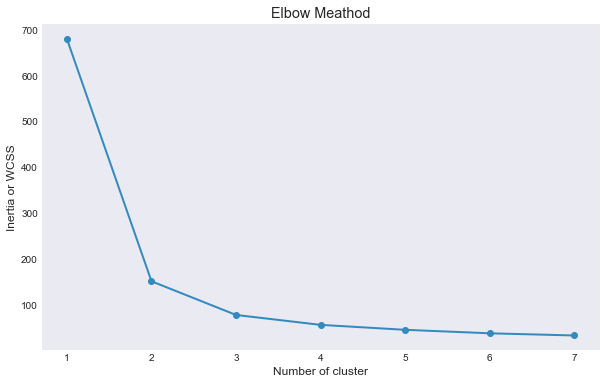

In [10]:
#ploting the elbow meathod
n_cluster=range(1,8)
plt.figure(figsize=(10,6))
plt.plot(n_cluster,inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia or WCSS')
plt.title('Elbow Meathod')

Text(0, 0.5, 'Distance')

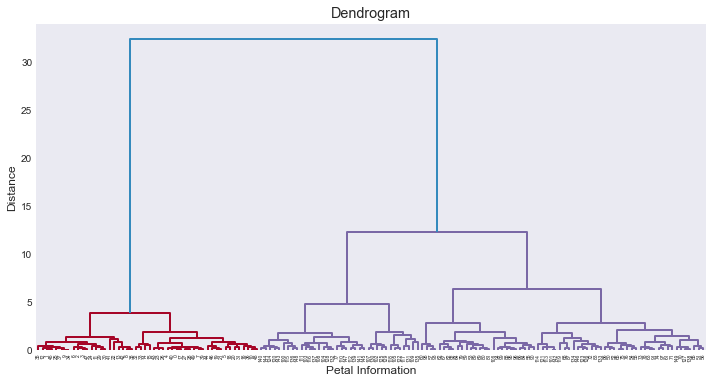

In [11]:
#plotting Dendrogram
plt.figure(figsize=(12,6))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Petal Information')
plt.ylabel('Distance')


In [12]:
#assigning data into clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_final=cluster.fit_predict(df)

In [13]:
cluster_final

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [14]:
#adding new column of assigned cluster
df['cluster']=cluster_final

In [15]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
#separating data as per there clusters
cluster1=df[df['cluster']==0]
cluster2=df[df['cluster']==1]
cluster3=df[df['cluster']==2]

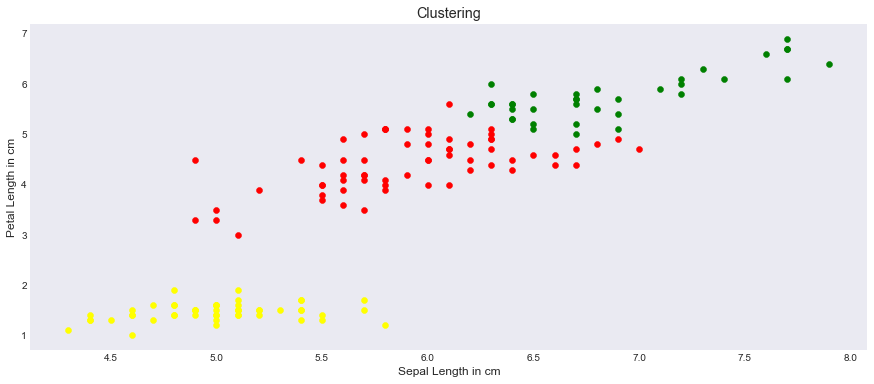

In [17]:
#ploting the cluster as per sepal length and petal length
plt.figure(figsize=(15,6))
plt.scatter(cluster1['SepalLengthCm'],cluster1['PetalLengthCm'],color="red")
plt.scatter(cluster2['SepalLengthCm'],cluster2['PetalLengthCm'],color="yellow")
plt.scatter(cluster3['SepalLengthCm'],cluster3['PetalLengthCm'],color='green')
plt.title('Clustering')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.show()